E:\_SoftEng\_BeCode\real-estate-price-predictor\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TEST_MODE is ON – running in test mode (reduced data, fewer trials).


[I 2025-06-29 11:07:32,219] A new study created in memory with name: no-name-6e2072cc-c8c9-4cb8-be4f-3afc4a28f3ce


[I 2025-06-29 11:07:43,646] Trial 0 finished with value: 98959.5542985087 and parameters: {'max_depth': 7, 'learning_rate': 0.25101465916850896, 'n_estimators': 754, 'subsample': 0.9198623089604329, 'colsample_bytree': 0.5751559456598526, 'reg_alpha': 0.6852707830497163, 'reg_lambda': 0.08374658005958757, 'min_child_weight': 9.121992727558192, 'gamma': 2.2375191374829297}. Best is trial 0 with value: 98959.5542985087.


[I 2025-06-29 11:07:59,723] Trial 1 finished with value: 100971.95928649112 and parameters: {'max_depth': 9, 'learning_rate': 0.23473157602785408, 'n_estimators': 783, 'subsample': 0.7430853339882206, 'colsample_bytree': 0.7652574652779982, 'reg_alpha': 0.703461706126292, 'reg_lambda': 0.26272583087885537, 'min_child_weight': 6.297026726525865, 'gamma': 2.159058320508624}. Best is trial 0 with value: 98959.5542985087.


[I 2025-06-29 11:08:11,238] Trial 2 finished with value: 95058.70258696025 and parameters: {'max_depth': 7, 'learning_rate': 0.11348876523456808, 'n_estimators': 713, 'subsample': 0.8787827091822975, 'colsample_bytree': 0.8909161984701, 'reg_alpha': 0.42877914492442215, 'reg_lambda': 0.21343098759834267, 'min_child_weight': 1.5439812551639713, 'gamma': 4.464579691439825}. Best is trial 2 with value: 95058.70258696025.


[I 2025-06-29 11:08:13,642] A new study created in memory with name: no-name-5ad38ead-50f3-4d5d-be81-62486074b8de


[I 2025-06-29 11:08:33,566] Trial 0 finished with value: 98261.47690271086 and parameters: {'max_depth': 10, 'learning_rate': 0.13507142146322365, 'n_estimators': 760, 'subsample': 0.9398082554053108, 'colsample_bytree': 0.9050401278393125, 'reg_alpha': 0.4803256180364427, 'reg_lambda': 0.46139601274252684, 'min_child_weight': 1.0901135685721397, 'gamma': 2.6604805492226613}. Best is trial 0 with value: 98261.47690271086.


[I 2025-06-29 11:08:44,750] Trial 1 finished with value: 102167.66949041522 and parameters: {'max_depth': 8, 'learning_rate': 0.2664929974238919, 'n_estimators': 695, 'subsample': 0.8189154573443208, 'colsample_bytree': 0.6413399448311771, 'reg_alpha': 0.46381913548535414, 'reg_lambda': 0.8025058674381499, 'min_child_weight': 5.6491939993487446, 'gamma': 1.9786960428232274}. Best is trial 0 with value: 98261.47690271086.


[I 2025-06-29 11:08:47,487] Trial 2 finished with value: 101865.20456013652 and parameters: {'max_depth': 7, 'learning_rate': 0.2440175728594423, 'n_estimators': 203, 'subsample': 0.5275025650128421, 'colsample_bytree': 0.5088140187017705, 'reg_alpha': 0.5252461704445182, 'reg_lambda': 0.7636194706741807, 'min_child_weight': 7.166858720130559, 'gamma': 0.7339581460136491}. Best is trial 0 with value: 98261.47690271086.


Evaluation – XGBoost + Optuna CV (All Features)
  MAE:  16,937.08 €
  RMSE: 23,554.49 €
  R²:   0.9873
----------------------------------------
Evaluation – XGBoost + Optuna CV (Top RF Features)
  MAE:  1,621.04 €
  RMSE: 6,090.36 €
  R²:   0.9992
----------------------------------------
[✓] Model evaluation for 'XGBoost + Optuna CV (All Features) [TEST]' logged.
[✓] Model evaluation for 'XGBoost + Optuna CV (Top RF Features) [TEST]' logged.
Evaluation Summary (All Features):
=== Model Evaluation Summary ===


,id,timestamp,model,dataset,experiment,cleaning_version_id,mae,rmse,r2,type,rank_r2,rmse/mae,best
0,82,2025-06-29 11:06:44,Linear Regression (All Features),immoweb_real_estate_cleaned_for_ml_20250629_1106.csv,Linear Regression (All Features),202506291106,76 898.76 €,109 935.46 €,0.723000,Linear,4,1.430000,
1,83,2025-06-29 11:07:10,Random Forest (All Features),immoweb_real_estate_cleaned_for_ml_20250629_1106.csv,Random Forest (All Features),202506291106,68 324.02 €,101 428.25 €,0.764200,Tree,2,1.480000,
2,84,2025-06-29 11:07:19,Random Forest (Top 10 Features),immoweb_real_estate_cleaned_for_ml_20250629_1106.csv,Random Forest (Top 10 Features),202506291106,71 734.61 €,106 140.03 €,0.741800,Tree,3,1.480000,
3,85,2025-06-29 11:08:51,XGBoost + Optuna CV (All Features) [TEST],immoweb_real_estate_cleaned_for_ml_20250629_1106.csv,XGBoost with Optuna (All Features) [TEST],202506291106,16 937.08 €,23 554.49 €,0.987300,Boosting,1,1.390000,✓



👉 Best model based on R²: XGBoost + Optuna CV (All Features) [TEST] ✓
Evaluation Summary (Top RF Features):
=== Model Evaluation Summary ===


,id,timestamp,model,dataset,experiment,cleaning_version_id,mae,rmse,r2,type,rank_r2,rmse/mae,best
0,82,2025-06-29 11:06:44,Linear Regression (All Features),immoweb_real_estate_cleaned_for_ml_20250629_1106.csv,Linear Regression (All Features),202506291106,76 898.76 €,109 935.46 €,0.723000,Linear,5,1.430000,
1,83,2025-06-29 11:07:10,Random Forest (All Features),immoweb_real_estate_cleaned_for_ml_20250629_1106.csv,Random Forest (All Features),202506291106,68 324.02 €,101 428.25 €,0.764200,Tree,3,1.480000,
2,84,2025-06-29 11:07:19,Random Forest (Top 10 Features),immoweb_real_estate_cleaned_for_ml_20250629_1106.csv,Random Forest (Top 10 Features),202506291106,71 734.61 €,106 140.03 €,0.741800,Tree,4,1.480000,
3,85,2025-06-29 11:08:51,XGBoost + Optuna CV (All Features) [TEST],immoweb_real_estate_cleaned_for_ml_20250629_1106.csv,XGBoost with Optuna (All Features) [TEST],202506291106,16 937.08 €,23 554.49 €,0.987300,Boosting,2,1.390000,
4,86,2025-06-29 11:08:51,XGBoost + Optuna CV (Top RF Features) [TEST],immoweb_real_estate_cleaned_for_ml_20250629_1106.csv,XGBoost with Optuna (Top RF Features) [TEST],202506291106,1 621.04 €,6 090.36 €,0.999200,Boosting,1,3.760000,✓



👉 Best model based on R²: XGBoost + Optuna CV (Top RF Features) [TEST] ✓
Diagnostics (All Features):


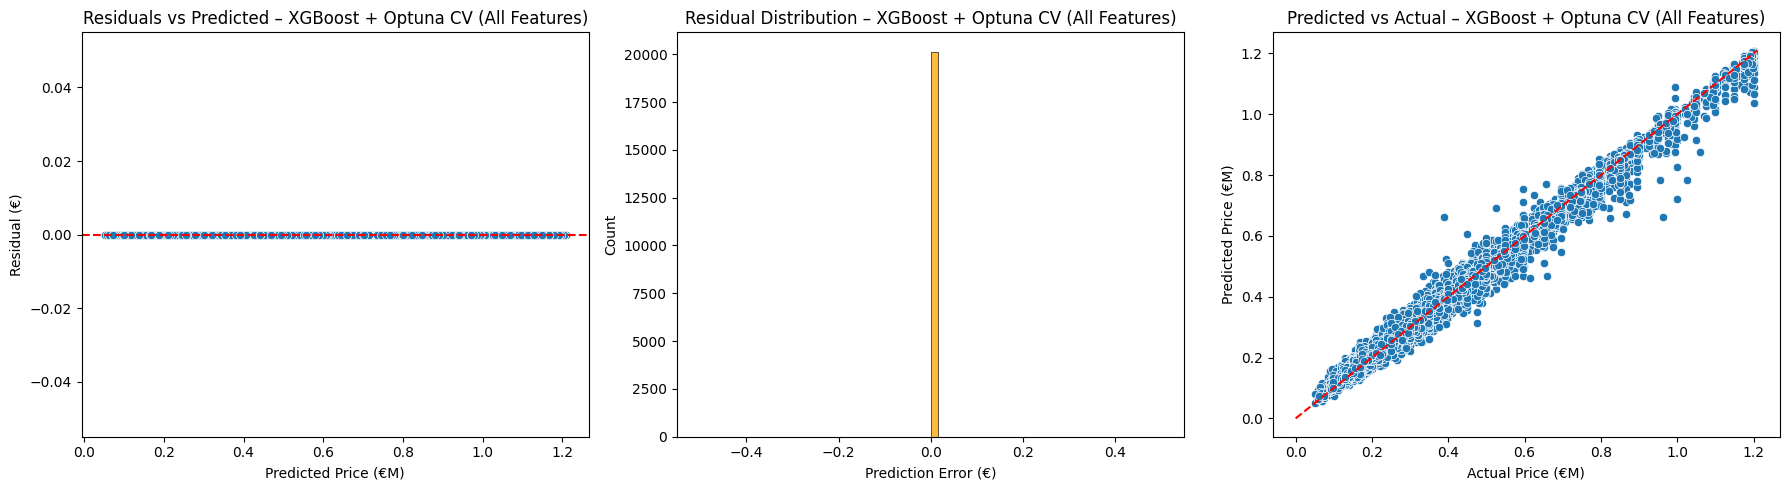

Diagnostics (Top RF Features):


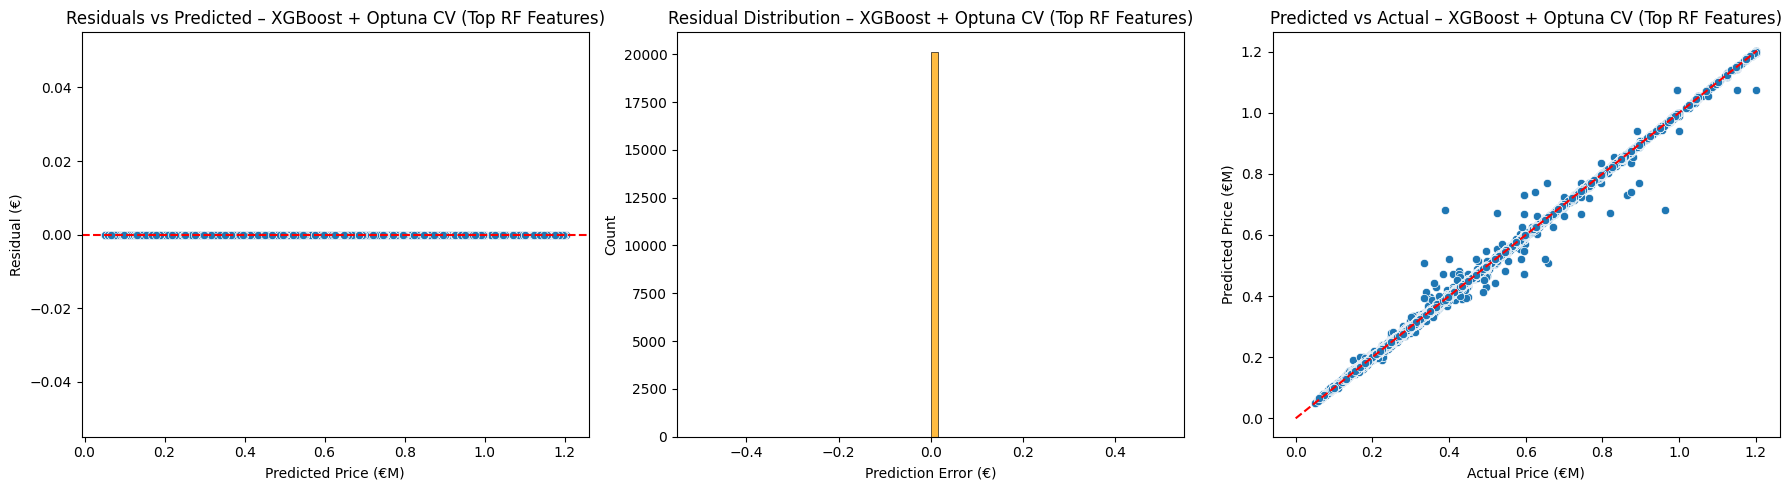

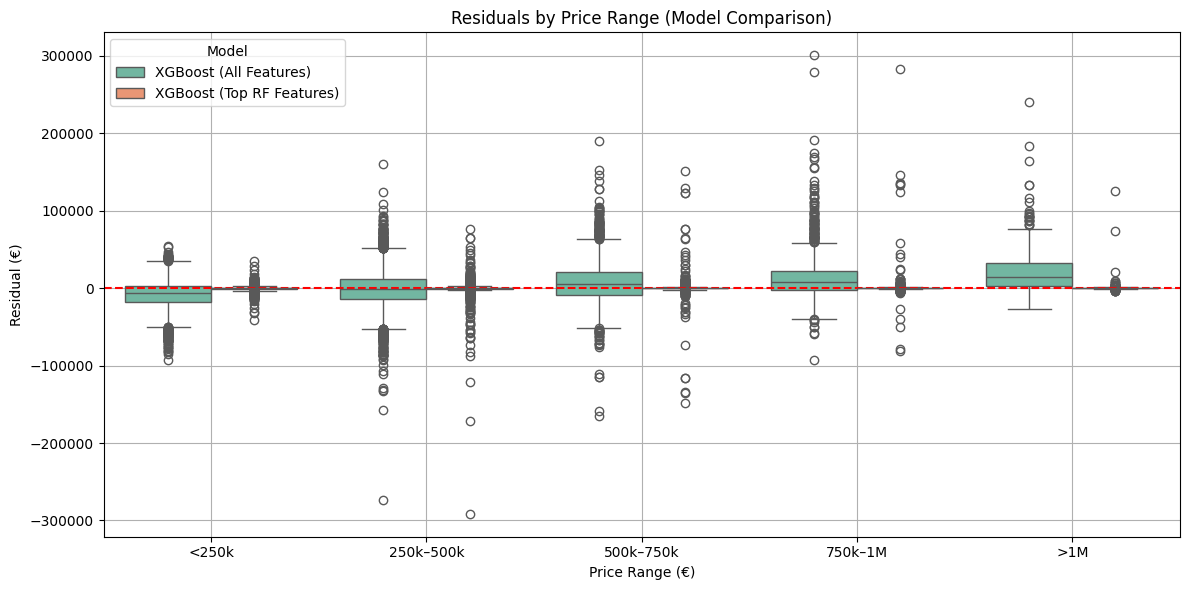

'\nModelEvaluator.plot_shap_comparison_beeswarm(\n    model_all=model_all,\n    x_all=X_reduced,\n    model_top=model_top,\n    x_top=X_top\n)\n'

In [1]:
import sys, os

# Add the project root to the Python path
project_root = os.path.abspath("../..")
sys.path.append(project_root)

import optuna
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from utils.constants import ML_READY_DATA_FILE, TEST_MODE
from utils.data_loader import DataLoader
from utils.model_evaluator import ModelEvaluator
from utils.experiment_tracker import ExperimentTracker
from utils.model_visualizer import ModelVisualizer
from utils.model_table import ModelComparativelTable  

import numpy as np
import pandas as pd


# Root Mean Squared Error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

if TEST_MODE:
    print("TEST_MODE is ON – running in test mode (reduced data, fewer trials).")
else:
    print("TEST_MODE is OFF – full training is active.")

# Step 1: Load and clean dataset
loader = DataLoader(ML_READY_DATA_FILE)
df = loader.load_data()

X = df.drop(columns=["price"])
y = df["price"]

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
selector.fit(X)  # Fit the selector on the full dataset
X_reduced = X.loc[:, selector.get_support()]

# Step 3: Extract top 30 features using Random Forest
rf_model_all = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_all.fit(X_reduced, y)

importances = rf_model_all.feature_importances_
feature_ranking = pd.Series(importances, index=X_reduced.columns).sort_values(ascending=False)
top_features = feature_ranking.head(30).index.tolist()
X_top = X_reduced[top_features]

# Step 4: Define Optuna tuning function
def tune_xgboost_with_optuna(X_data, y_data, n_trials=50):
    def objective(trial):
        params = {
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "n_estimators": trial.suggest_int("n_estimators", 100, 800),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
            "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
            "gamma": trial.suggest_float("gamma", 0, 5),
        }
        model = xgb.XGBRegressor(**params, objective="reg:squarederror", random_state=42, n_jobs=-1)
        cv = KFold(n_splits=5, shuffle=True, random_state=42)
        scores = -cross_val_score(model, X_data, y_data, scoring="neg_root_mean_squared_error", cv=cv)
        return scores.mean()

    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)
    return study


# Step 5: Tune and train both models
n_trials = 3 if TEST_MODE else 50

study_all = tune_xgboost_with_optuna(X_reduced, y, n_trials=n_trials)
model_all = xgb.XGBRegressor(**study_all.best_params, objective="reg:squarederror", random_state=42, n_jobs=-1)
model_all.fit(X_reduced, y)
y_pred_all = model_all.predict(X_reduced)

study_top = tune_xgboost_with_optuna(X_top, y, n_trials=n_trials)
model_top = xgb.XGBRegressor(**study_top.best_params, objective="reg:squarederror", random_state=42, n_jobs=-1)
model_top.fit(X_top, y)
y_pred_top = model_top.predict(X_top)

# Step 6: Evaluate models
evaluator_all = ModelEvaluator("XGBoost + Optuna CV (All Features)")
mae_all, rmse_all, r2_all = evaluator_all.evaluate(y, y_pred_all)

evaluator_top = ModelEvaluator("XGBoost + Optuna CV (Top RF Features)")
mae_top, rmse_top, r2_top = evaluator_top.evaluate(y, y_pred_top)

# Step 7: Log results
# Ajout du suffixe TEST si nécessaire
suffix = " [TEST]" if TEST_MODE else ""

# Init tracker
tracker = ExperimentTracker()

# Log modèle All Features
df_metrics_all = tracker.log_and_get_evaluations(
    model=f"XGBoost + Optuna CV (All Features){suffix}",
    experiment=f"XGBoost with Optuna (All Features){suffix}",
    mae=mae_all,
    rmse=rmse_all,
    r2=r2_all,
)

# Log modèle Top RF Features
df_metrics_top = tracker.log_and_get_evaluations(
    model=f"XGBoost + Optuna CV (Top RF Features){suffix}",
    experiment=f"XGBoost with Optuna (Top RF Features){suffix}",
    mae=mae_top,
    rmse=rmse_top,
    r2=r2_top,
)

# Step 8: Display evaluation summary
print("Evaluation Summary (All Features):")
evaluator_all.display_model_summary(df_metrics_all)

print("Evaluation Summary (Top RF Features):")
evaluator_top.display_model_summary(df_metrics_top)

# Step 9: Visual diagnostics
print("Diagnostics (All Features):")
visualizer_all = ModelVisualizer(model_all, X_reduced, y, model_name="XGBoost + Optuna CV (All Features)")
visualizer_all.plot_all_diagnostics()

print("Diagnostics (Top RF Features):")
visualizer_top = ModelVisualizer(model_top, X_top, y, model_name="XGBoost + Optuna CV (Top RF Features)")
visualizer_top.plot_all_diagnostics()


ModelEvaluator.plot_price_range_residuals_side_by_side(
    y,
    y_pred_all,
    y_pred_top,
    model_names=("XGBoost (All Features)", "XGBoost (Top RF Features)")
)

"""
ModelEvaluator.plot_shap_comparison_beeswarm(
    model_all=model_all,
    x_all=X_reduced,
    model_top=model_top,
    x_top=X_top
)
"""



In [2]:
import sys, os

# Add the project root to the Python path
project_root = os.path.abspath("../..")
sys.path.append(project_root)

import joblib
from datetime import datetime
from utils.constants import TEST_MODE, MODELS_DIR

# Create timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M")

# Add suffix if in TEST mode
suffix = "_TEST" if TEST_MODE else ""

# Define subdirectory for .pkl files
PKL_DIR = os.path.join(MODELS_DIR, "pkl")
os.makedirs(PKL_DIR, exist_ok=True)

# Build filenames
filename_all = f"xgboost_optuna_all_{timestamp}{suffix}.pkl"
filename_top = f"xgboost_optuna_top30_{timestamp}{suffix}.pkl"

# Save models
joblib.dump(model_all, os.path.join(PKL_DIR, filename_all))
joblib.dump(model_top, os.path.join(PKL_DIR, filename_top))

print(f"[✔] Models saved to '{PKL_DIR}' as:\n - {filename_all}\n - {filename_top}")


[✔] Models saved to 'E:\_SoftEng\_BeCode\real-estate-price-predictor\models\pkl' as:
 - xgboost_optuna_all_20250629_1108_TEST.pkl
 - xgboost_optuna_top30_20250629_1108_TEST.pkl
